In [5]:
import numpy as np
import pandas as pd
import association_functions as asf
import seaborn as sns

# Read data from csv
title_data = pd.read_csv('../data/data_title_fully_processed.csv')
pop_data = pd.read_csv('../data/date_popularity_processed.csv')

# Extract columns
processed_titles = title_data['processed_title'].values
popularity = pop_data['popularity'].values
likes = pop_data['likes'].values
views = pop_data['views'].values

# Restructure title data
title_tokens = asf.split_tokens(processed_titles)

# Association rule mining
rules, support, confidence, lift = asf.extract_rules(title_tokens, 0.001, 0.1)

# Generate median views for rules
med_rule_views = np.empty_like(support)
for i, rule in enumerate(rules):
    med_rule_views[i] = np.median(asf.rule_metrics(rule, title_tokens, views))

# Generate median likes for rules
med_rule_likes = np.empty_like(support)
for i, rule in enumerate(rules):
    med_rule_likes[i] = np.median(asf.rule_metrics(rule, title_tokens, likes))

Text(0, 0.5, 'Median likes')

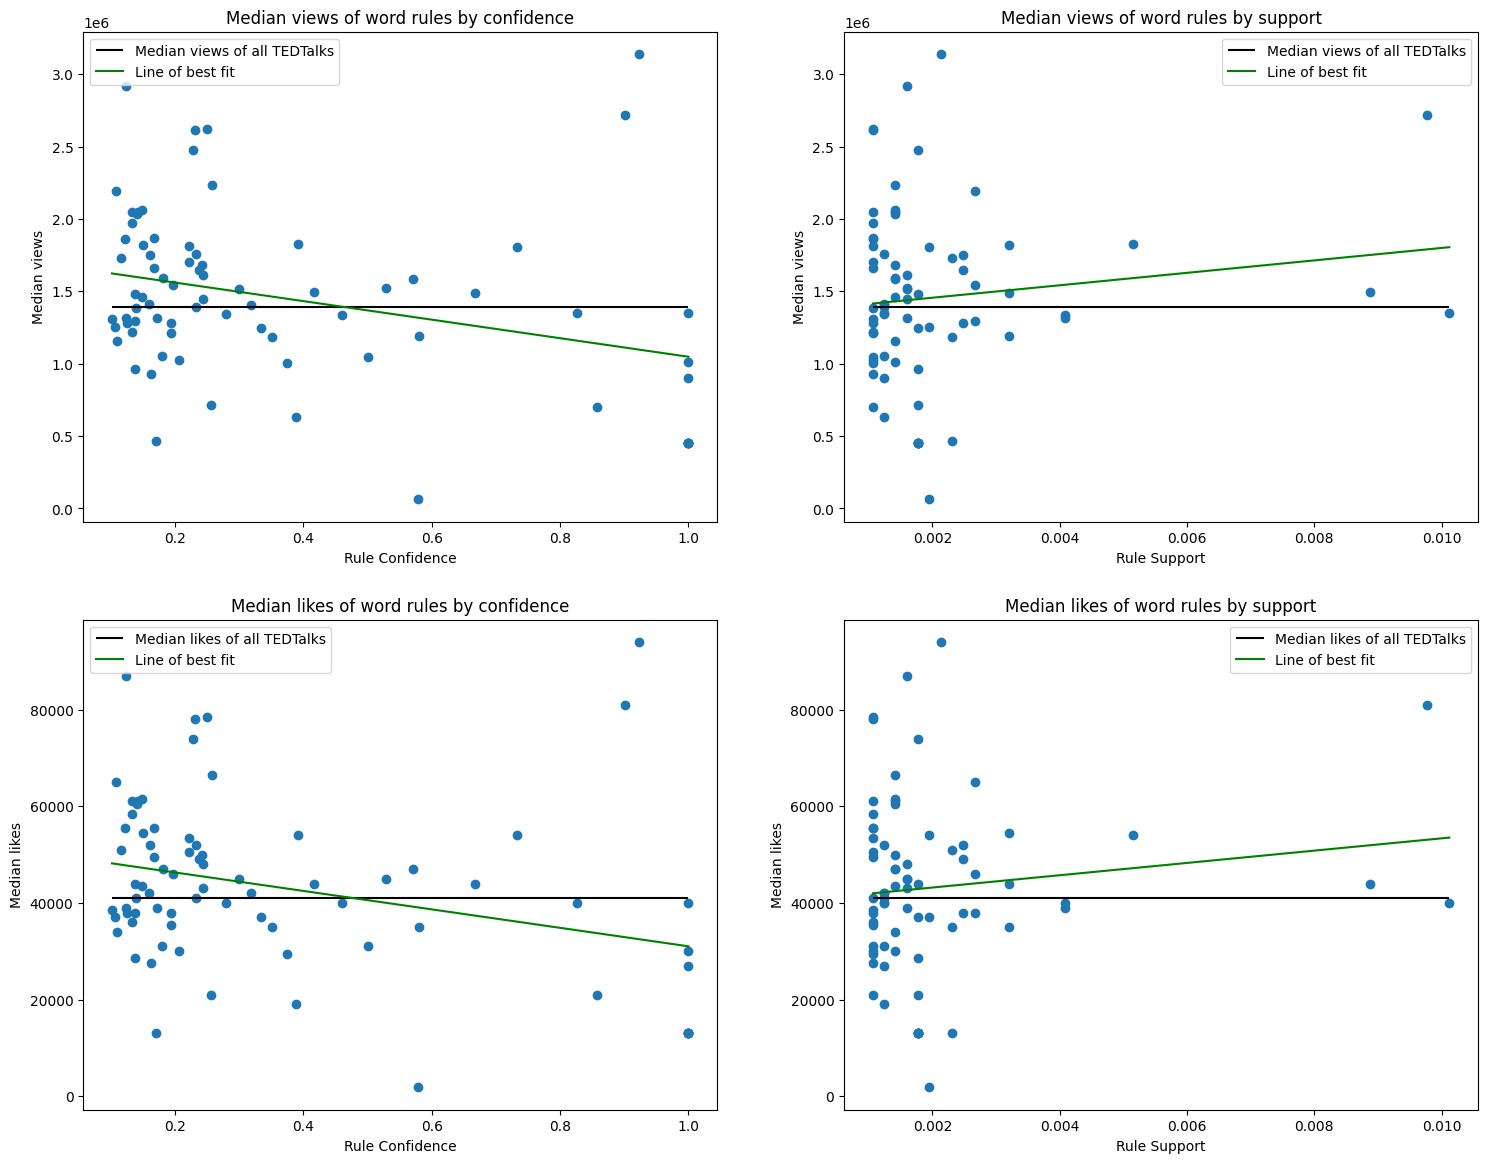

In [6]:
import matplotlib.pyplot as plt

# Plot figures
plt.figure(figsize=[18, 14])

plt.subplot(2, 2, 1)
plt.scatter(confidence, med_rule_views)
plt.hlines(np.median(views), np.min(confidence), np.max(confidence), colors='black', label='Median views of all TEDTalks')
b, a = np.polyfit(confidence, med_rule_views, deg=1)
x = np.linspace(np.min(confidence), np.max(confidence), num=100)
plt.plot(x, a + b*x, color='green', label='Line of best fit')
plt.legend()
plt.title("Median views of word rules by confidence")
plt.xlabel("Rule Confidence")
plt.ylabel("Median views")

plt.subplot(2, 2, 2)
plt.scatter(support, med_rule_views)
plt.hlines(np.median(views), np.min(support), np.max(support), colors='black', label='Median views of all TEDTalks')
b, a = np.polyfit(support, med_rule_views, deg=1)
x = np.linspace(np.min(support), np.max(support), num=100)
plt.plot(x, a + b*x, color='green', label='Line of best fit')
plt.legend()
plt.title("Median views of word rules by support")
plt.xlabel("Rule Support")
plt.ylabel("Median views")

plt.subplot(2, 2, 3)
plt.scatter(confidence, med_rule_likes)
plt.hlines(np.median(likes), np.min(confidence), np.max(confidence), colors='black', label='Median likes of all TEDTalks')
b, a = np.polyfit(confidence, med_rule_likes, deg=1)
x = np.linspace(np.min(confidence), np.max(confidence), num=100)
plt.plot(x, a + b*x, color='green', label='Line of best fit')
plt.legend()
plt.title("Median likes of word rules by confidence")
plt.xlabel("Rule Confidence")
plt.ylabel("Median likes")

plt.subplot(2, 2, 4)
plt.scatter(support, med_rule_likes)
plt.hlines(np.median(likes), np.min(support), np.max(support), colors='black', label='Median likes of all TEDTalks')
b, a = np.polyfit(support, med_rule_likes, deg=1)
x = np.linspace(np.min(support), np.max(support), num=100)
plt.plot(x, a + b*x, color='green', label='Line of best fit')
plt.legend()
plt.title("Median likes of word rules by support")
plt.xlabel("Rule Support")
plt.ylabel("Median likes")

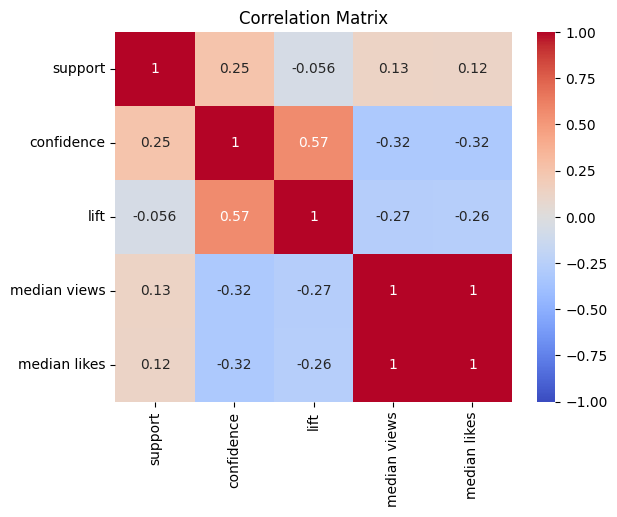

In [7]:
# Correlation matrix
supArr = np.array(support)
confArr = np.array(confidence)
liftArr = np.array(lift)

matrix = np.vstack((supArr, confArr, liftArr, med_rule_views, med_rule_likes)).T
df = pd.DataFrame(matrix, columns=['support', 'confidence', 'lift', 'median views', 'median likes'])
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()